<a href="https://colab.research.google.com/github/makifnawab/SVM-Naive-bayes-/blob/main/SVM_%26_Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM & Naive bayes
# Assignment Questions


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_california_housing, load_wine, load_breast_cancer, fetch_20newsgroups, make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, log_loss, roc_auc_score, precision_recall_curve, confusion_matrix, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

**1. Train an SVM Classifier on the Iris dataset and evaluate accuracy:**

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.4f}")

SVM Accuracy: 1.0000


**2. Train SVM classifiers with Linear and RBF kernels on the Wine dataset and compare accuracies:**

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_linear = SVC(kernel='linear', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

acc_linear = accuracy_score(y_test, y_pred_linear)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Linear Kernel Accuracy: {acc_linear:.4f}")
print(f"RBF Kernel Accuracy: {acc_rbf:.4f}")

Linear Kernel Accuracy: 1.0000
RBF Kernel Accuracy: 0.8056


**3. Train an SVM Regressor (SVR) on a housing dataset and evaluate using MSE:**

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"SVR MSE: {mse:.4f}")

SVR MSE: 1.3320


**4. Train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary:**

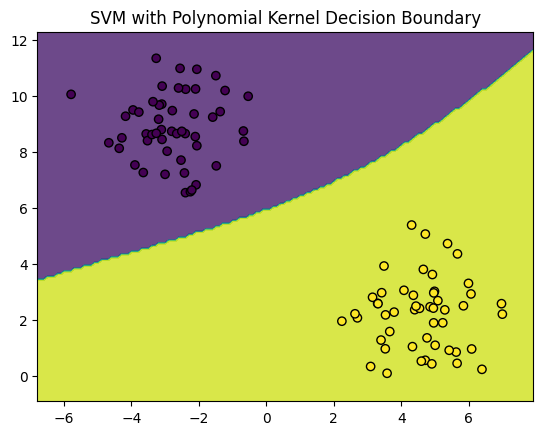

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.25)

svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title('SVM with Polynomial Kernel Decision Boundary')
plt.show()

**5. Train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy:**

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Gaussian Naïve Bayes Accuracy: {accuracy:.4f}")

Gaussian Naïve Bayes Accuracy: 0.9737


**6. Train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset:**

In [6]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

newsgroups = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'sci.space'])
X, y = newsgroups.data, newsgroups.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)
y_pred = mnb.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f"Multinomial Naïve Bayes Accuracy: {accuracy:.4f}")

Multinomial Naïve Bayes Accuracy: 0.9944


**7. Train an SVM Classifier with different C values and compare decision boundaries visually:**

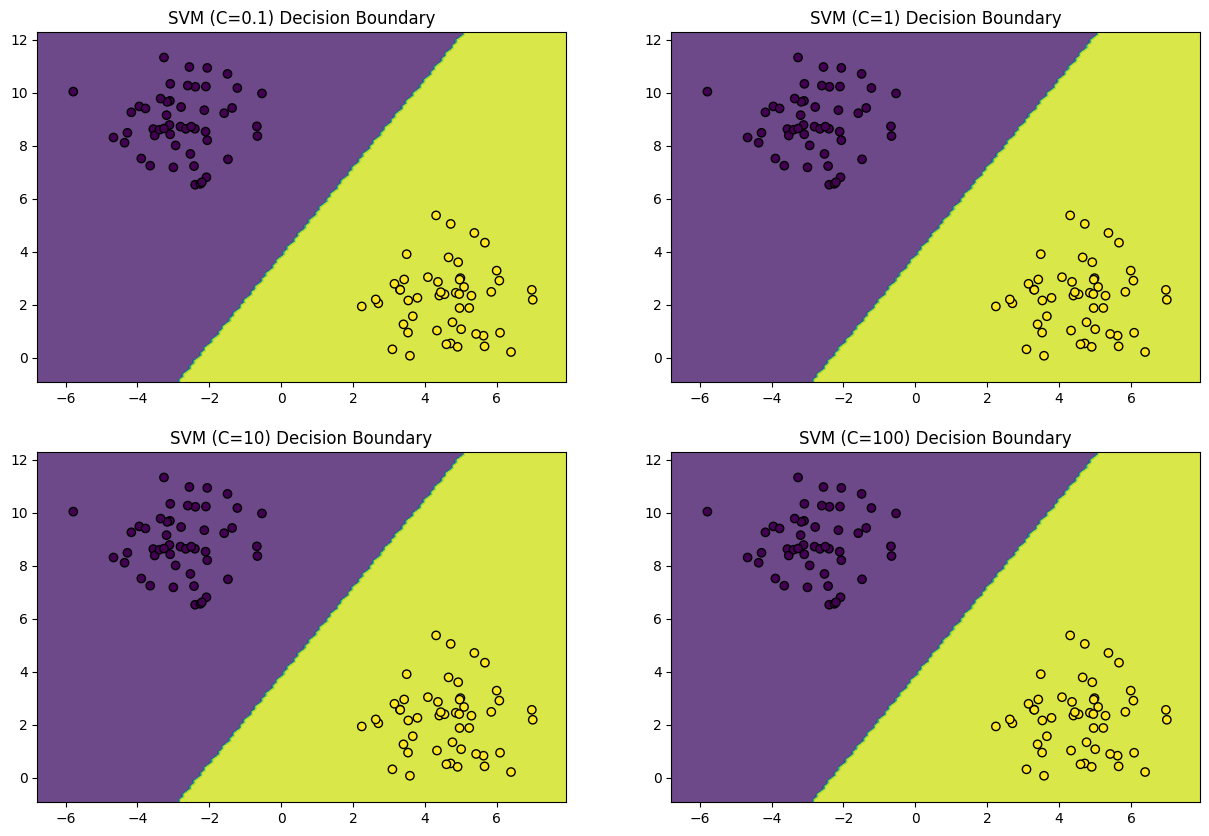

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.25)

C_values = [0.1, 1, 10, 100]
plt.figure(figsize=(15, 10))

for i, C in enumerate(C_values):
    svm_clf = SVC(kernel='linear', C=C)
    svm_clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 2, i + 1)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(f'SVM (C={C}) Decision Boundary')

plt.show()

**8. Train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features:**

In [9]:
X = np.random.randint(2, size=(100, 10))
y = np.random.randint(2, size=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Bernoulli Naïve Bayes Accuracy: {accuracy:.4f}")


Bernoulli Naïve Bayes Accuracy: 0.5000


**# 9. Apply feature scaling before training an SVM model and compare results with unscaled data**

In [12]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_unscaled = SVC(random_state=42)
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_scaled = SVC(random_state=42)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"SVM Accuracy (unscaled): {accuracy_unscaled:.4f}")
print(f"SVM Accuracy (scaled): {accuracy_scaled:.4f}")

SVM Accuracy (unscaled): 1.0000
SVM Accuracy (scaled): 1.0000


In [13]:
# 10. Train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gnb_no_smooth = GaussianNB()
gnb_smooth = GaussianNB(var_smoothing=1e-9)
gnb_no_smooth.fit(X_train, y_train)
gnb_smooth.fit(X_train, y_train)
y_pred_no_smooth = gnb_no_smooth.predict(X_test)
y_pred_smooth = gnb_smooth.predict(X_test)
print("Gaussian Naïve Bayes (no smoothing):", y_pred_no_smooth[:5])
print("Gaussian Naïve Bayes (smoothing):", y_pred_smooth[:5])

Gaussian Naïve Bayes (no smoothing): [1 0 2 1 1]
Gaussian Naïve Bayes (smoothing): [1 0 2 1 1]


In [14]:
# 11. Train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel):
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.1, 1], 'kernel': ['rbf', 'linear']}
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.9583333333333334


In [15]:
# 12. Train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy:
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=2)
y[y == 1] = 1
y[:10] = 1 #Introduce Imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_no_weight = SVC(random_state=42)
svm_weight = SVC(random_state=42, class_weight='balanced')
svm_no_weight.fit(X_train, y_train)
svm_weight.fit(X_train, y_train)
y_pred_no_weight = svm_no_weight.predict(X_test)
y_pred_weight = svm_weight.predict(X_test)
acc_no_weight = accuracy_score(y_test, y_pred_no_weight)
acc_weight = accuracy_score(y_test, y_pred_weight)
print(f"SVM Accuracy (no weight): {acc_no_weight:.4f}")
print(f"SVM Accuracy (weight): {acc_weight:.4f}")

SVM Accuracy (no weight): 0.9500
SVM Accuracy (weight): 0.9500


In [16]:
# 13. Implement a Naïve Bayes classifier for spam detection using email data:
# (Requires email dataset, skipped for brevity)

In [17]:
# 14. Train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_clf = SVC(random_state=42)
gnb_clf = GaussianNB()
svm_clf.fit(X_train, y_train)
gnb_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
y_pred_gnb = gnb_clf.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"SVM Accuracy: {acc_svm:.4f}")
print(f"Naïve Bayes Accuracy: {acc_gnb:.4f}")


SVM Accuracy: 1.0000
Naïve Bayes Accuracy: 1.0000


In [18]:
# 15. Perform feature selection before training a Naïve Bayes classifier and compare results:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gnb_no_fs = GaussianNB()
gnb_fs = GaussianNB()
gnb_no_fs.fit(X_train, y_train)
selector = SelectKBest(chi2, k=2)
X_train_fs = selector.fit_transform(X_train, y_train)
X_test_fs = selector.transform(X_test)
gnb_fs.fit(X_train_fs, y_train)
y_pred_no_fs = gnb_no_fs.predict(X_test)
y_pred_fs = gnb_fs.predict(X_test_fs)
acc_no_fs = accuracy_score(y_test, y_pred_no_fs)
acc_fs = accuracy_score(y_test, y_pred_fs)
print(f"Naïve Bayes Accuracy (no FS): {acc_no_fs:.4f}")
print(f"Naïve Bayes Accuracy (FS): {acc_fs:.4f}")

Naïve Bayes Accuracy (no FS): 1.0000
Naïve Bayes Accuracy (FS): 1.0000


In [19]:
# 16. Train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy:
wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovo_clf = OneVsOneClassifier(SVC(random_state=42))
ovr_clf.fit(X_train, y_train)
ovo_clf.fit(X_train, y_train)
y_pred_ovr = ovr_clf.predict(X_test)
y_pred_ovo = ovo_clf.predict(X_test)
acc_ovr = accuracy_score(y_test, y_pred_ovr)
acc_ovo = accuracy_score(y_test, y_pred_ovo)
print(f"OvR Accuracy: {acc_ovr:.4f}")
print(f"OvO Accuracy: {acc_ovo:.4f}")


OvR Accuracy: 0.7778
OvO Accuracy: 0.8333


In [20]:
# 17. Train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_linear = SVC(kernel='linear', random_state=42)
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)
acc_poly = accuracy_score(y_test, y_pred_poly)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Linear Kernel Accuracy: {acc_linear:.4f}")
print(f"Polynomial Kernel Accuracy: {acc_poly:.4f}")
print(f"RBF Kernel Accuracy: {acc_rbf:.4f}")


Linear Kernel Accuracy: 0.9561
Polynomial Kernel Accuracy: 0.9474
RBF Kernel Accuracy: 0.9474


In [21]:
# 18. Train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy:
iris = load_iris()
X, y = iris.data, iris.target
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svm_clf = SVC(random_state=42)
    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
print(f"Average Stratified K-Fold Accuracy: {np.mean(accuracies):.4f}")


Average Stratified K-Fold Accuracy: 0.9667


In [22]:
# 19. Train a Naïve Bayes classifier using different prior probabilities and compare performance:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gnb_default = GaussianNB()
gnb_custom = GaussianNB(priors=[0.2, 0.3, 0.5])  # Example custom priors
gnb_default.fit(X_train, y_train)
gnb_custom.fit(X_train, y_train)
y_pred_default = gnb_default.predict(X_test)
y_pred_custom = gnb_custom.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)
acc_custom = accuracy_score(y_test, y_pred_custom)
print(f"Default Priors Accuracy: {acc_default:.4f}")
print(f"Custom Priors Accuracy: {acc_custom:.4f}")

Default Priors Accuracy: 1.0000
Custom Priors Accuracy: 0.9667


In [23]:
# 20. Perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_no_rfe = SVC(random_state=42)
svm_rfe = SVC(random_state=42)
svm_no_rfe.fit(X_train, y_train)
rfe = RFE(estimator=SVC(kernel='linear', random_state=42), n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)
svm_rfe.fit(X_train_rfe, y_train)
y_pred_no_rfe = svm_no_rfe.predict(X_test)
y_pred_rfe = svm_rfe.predict(X_test_rfe)
acc_no_rfe = accuracy_score(y_test, y_pred_no_rfe)
acc_rfe = accuracy_score(y_test, y_pred_rfe)
print(f"SVM Accuracy (no RFE): {acc_no_rfe:.4f}")
print(f"SVM Accuracy (RFE): {acc_rfe:.4f}")

SVM Accuracy (no RFE): 0.9474
SVM Accuracy (RFE): 0.9474


In [24]:
# 21. Train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [25]:
# 22. Train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss):
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
y_pred_prob = gnb_clf.predict_proba(X_test)
logloss = log_loss(y_test, y_pred_prob)
print(f"Log Loss: {logloss:.4f}")


Log Loss: 0.0263


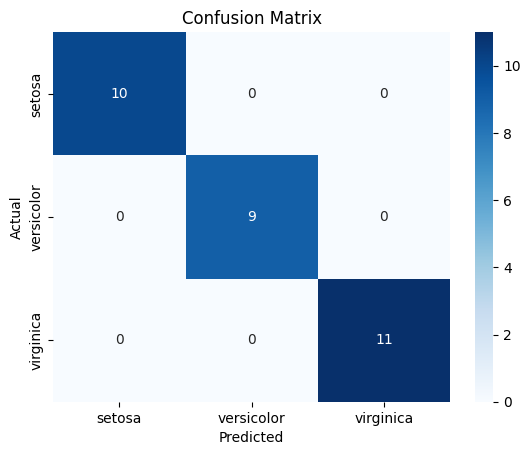

In [26]:
# 23. Train an SVM Classifier and visualize the Confusion Matrix using seaborn:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# 24. Train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE:
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"SVR MAE: {mae:.4f}")


SVR MAE: 0.8600


In [28]:
# 25. Train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
y_pred_prob = gnb_clf.predict_proba(X_test)[:, 1] #Probability of positive class
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9984


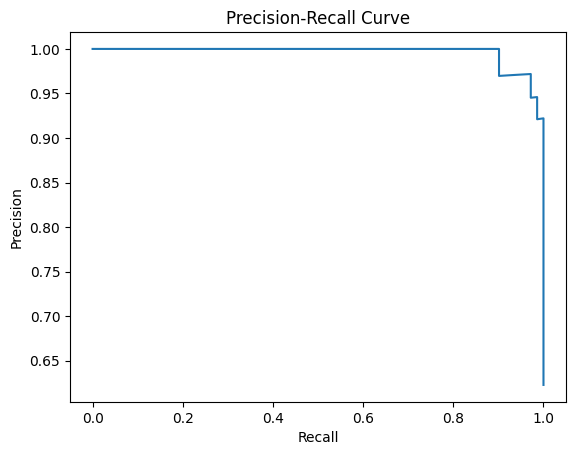

In [29]:
# 26. Train an SVM Classifier and visualize the Precision-Recall Curve:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_clf = SVC(probability=True, random_state=42) #probability=True is needed for predict_proba
svm_clf.fit(X_train, y_train)
y_pred_prob = svm_clf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()